<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_11_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NESTEROV ACCELERATED GRADIENT (NAG)**

**Python Implementation By Areefa (18K41A0505)**

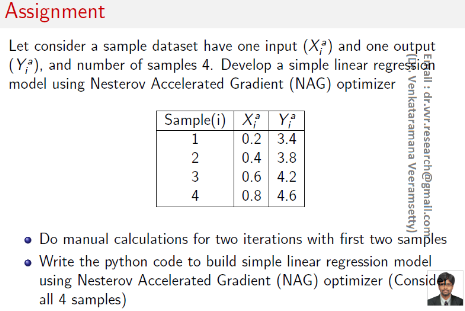

In [1]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6
4,5,1.0,5.0


**No missing values**

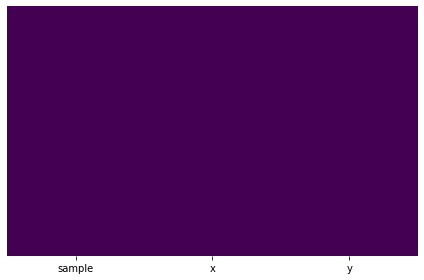

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

**Manually lets split the dataset**

In [3]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

**NAG ALGORITHM**

In [6]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
lr=0.1
epochs=100
gama=0.9
iter=1
sample=1
vm = vc = 0 #assuming to start from zero velocity
ns = len(x_train) #number of samples in training dataset
while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi+gama*vm) 
    derivE_m = derivE_m.subs(c, ci+gama*vc)

    xi = x_train['x'][sample-1]
    yi = y_train['y'][sample-1]
    derivE_m = derivE_m.subs(x,xi)
    derivE_m = derivE_m.subs(y,yi)

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi+gama*vm) 
    derivE_c = derivE_c.subs(c, ci+gama*vc)
    derivE_c = derivE_c.subs(x,xi)
    derivE_c = derivE_c.subs(y,yi)

    gm = derivE_m
    gc = derivE_c

    #step 5 compute velocity (before steplen)
    vm = gama*vm - lr*gm
    vc = gama*vc - lr*gc

    #step 6 update model params
    mi = mi+vm
    ci = ci+vc
    print(mi)
    print(ci)

    #step 7 increment sample
    sample = sample+1
    print('-----------------------------------')
  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

ITERATION 1
Sample 1
1.08400000000000
-0.580000000000000
-----------------------------------
Sample 2
1.30112640000000
0.151816000000000
-----------------------------------
Sample 3
1.64603769024000
1.05961295040000
-----------------------------------
ITERATION 2
Sample 1
1.97909941593498
1.98983802815488
-----------------------------------
Sample 2
2.28131166563012
2.83318233955843
-----------------------------------
Sample 3
2.49785226031364
3.49977483641811
-----------------------------------
ITERATION 3
Sample 1
2.66797367867486
3.97588249932207
-----------------------------------
Sample 2
2.75177045207933
4.23109813813407
-----------------------------------
Sample 3
2.70976126362630
4.26508173886978
-----------------------------------
ITERATION 4
Sample 1
2.64335184245186
4.15266122169836
-----------------------------------
Sample 2
2.53218671933079
3.92299114608388
-----------------------------------
Sample 3
2.37360385193318
3.61873098371645
-----------------------------------
I

**TRAINING ERROR**

In [9]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = mi*x_train['x'][i]+ci
  y_train_pred.append(ycalc.round(1))
y_train_pred

[3.4, 3.8, 4.2]

In [8]:
y_train_list = list(y_train['y']) #typecasting tuple to list
y_train_list

[3.4, 3.8, 4.2]

In [10]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
[0.00156249999999991, -0.000781250000000178, -0.00312499999999982]
Mean square error:  -0.000781250000000030


In [11]:
x_train_list = list(x_train['x']) #typecasting tuple to list
x_train_list

[0.2, 0.4, 0.6]

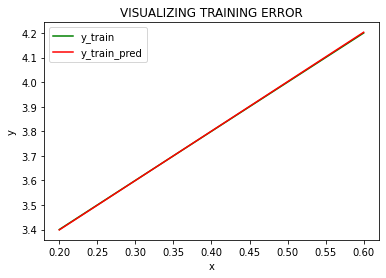

In [12]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [13]:
y_test_pred = []
for i in x_test['x']:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc.round(1))
y_test_pred

[4.6, 5.00000000000000]

In [14]:
y_test_list = list(y_test['y'])

In [15]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[-0.00156250000000036, 0]
Mean Square Error:  -0.000781250000000178


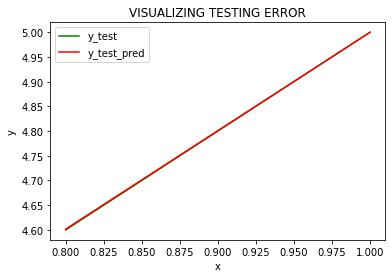

In [16]:
x_test_list = list(x_test['x'])
y_test_list = list(y_test['y'])
#Plot a line graph
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Optimal m and c values**

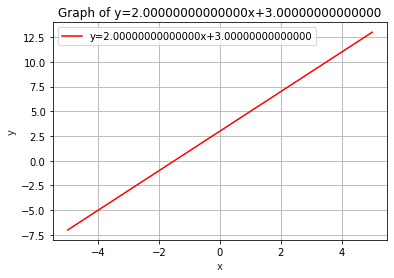

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = mi*x+ci
plt.plot(x, y, '-r', label='y='+str(mi)+'x+'+str(ci))
plt.title('Graph of '+'y='+str(mi)+'x+'+str(ci))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**PREDICTION**

In [21]:

print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.8
Predicted y value: 6.60
